In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('/Users/dehilinesma/Downloads/iris-data.csv')


First we have a quick preview at the data set with head() function.
Now let's look at the info of the file.

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   145 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


It's a 2240 rows x 29 columns file

In [50]:
## We look for non-numeric data
cat = data.select_dtypes(include=['object'])
cat.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [51]:
# We look for numeric data
num= data.select_dtypes(exclude=['object'])
num.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print("Non-Numeric columns:")
    for col in non_numeric_df:
        print(f"{col}")
    print("")
    print("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")

In [6]:
printColumnTypes(cat_df, num_df)

Non-Numeric columns:
class

Numeric columns:
sepal_length_cm
sepal_width_cm
petal_length_cm
petal_width_cm


In [56]:
data.duplicated().any()

True

In [8]:
#Check for duplicates in ID column

In [57]:
data[data.duplicated()]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [58]:
data.loc[data.duplicated(), :]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [59]:
data.drop_duplicates(inplace=True)

In [60]:
## Missing data check
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [61]:
#finding missing data
data[data.isna().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


In [62]:
# Data check
file.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class_enc
count,148.000000,148.000000,148.000000,148.000000,148.000000
mean,5.845270,3.056757,3.764865,1.206419,1.000000
std,0.806127,0.435056,1.763109,0.760846,0.816497
min,4.400000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


<AxesSubplot:>

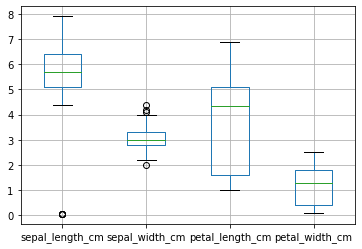

In [65]:
data.boxplot()

In [66]:
data[data['sepal_length_cm'] < 1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
77,0.067,3.0,5.0,1.7,Iris-versicolor
78,0.060,2.9,4.5,1.5,Iris-versicolor
79,0.057,2.6,3.5,1.0,Iris-versicolor
80,0.055,2.4,3.8,1.1,Iris-versicolor
81,0.055,2.4,3.7,1.0,Iris-versicolor


In [67]:
data[data['sepal_length_cm'] < 1].mean()

/var/folders/5y/q1schvhj60b6r5_4vkhjylg40000gn/T/ipykernel_22872/2669461990.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data[data['sepal_length_cm'] < 1].mean()


sepal_length_cm    0.0588
sepal_width_cm     2.6600
petal_length_cm    4.1000
petal_width_cm     1.2600
dtype: float64

In [68]:
data.loc[data['sepal_length_cm'] < 1, 'sepal_length_cm'] = data['sepal_length_cm']*100

In [71]:
#Replace
data.loc[data['class'] == "versicolor", 'class'] = "Iris-versicolor"

In [70]:
data.loc[data['class'] == "Iris-setossa", 'class'] = "Iris-setosa"

In [72]:
data.corr()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
sepal_length_cm,1.000000,-0.103779,0.851030,0.797454
sepal_width_cm,-0.103779,1.000000,-0.418822,-0.346795
petal_length_cm,0.851030,-0.418822,1.000000,0.958337
petal_width_cm,0.797454,-0.346795,0.958337,1.000000


In [73]:
## Missing data 
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     5
class              0
dtype: int64

In [74]:
data['petal_width_cm'][data['class'] == 'Iris-setosa'].mean()

0.2545454545454545

In [75]:
# imputing with mean
data['petal_width_cm'].fillna(data['petal_width_cm'][data['class'] == 'Iris-setosa'].mean(), inplace=True)

In [76]:
#Check if NA values left
data.isna().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

In [77]:
#Check all the lines with missing data
data[data.isna().any(axis=1)]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class


## Encoding

In [80]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#Encode Education
data["class_enc"] = label.fit_transform(data["class"])

In [45]:
##Exporting File after encoding
#data.to_csv('/Users/dehilinesma/Downloads/iris-datacleaned.csv')

In [81]:
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class,class_enc
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


# Plot

In [82]:
import seaborn as sns

<AxesSubplot:>

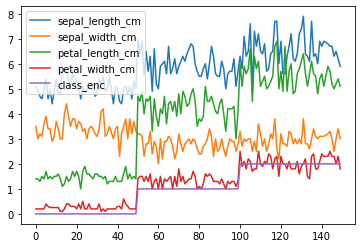

In [83]:
data.plot()

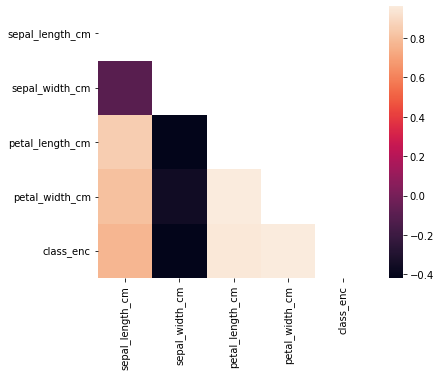

In [85]:
corr=data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, square=True)